## Background selection SELF
You are given 2D "signal" and 2D "signal + background". You need to:
1. Construct a generative model
2. Plot the definetely identified background (p_background > 0.9) 
3. Plot likelihood histogram for signal candidates (p_background < 0.9)

In case your model runs too slow, feel free to use a subsample.

In [1]:
import numpy as np
import seaborn as sns
%matplotlib inline

/root/miniconda/envs/rep_py2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
signal = np.load("../../day_1/basic_seminars/signal.npy")
mix = np.load("../../day_1/basic_seminars/mix.npy")

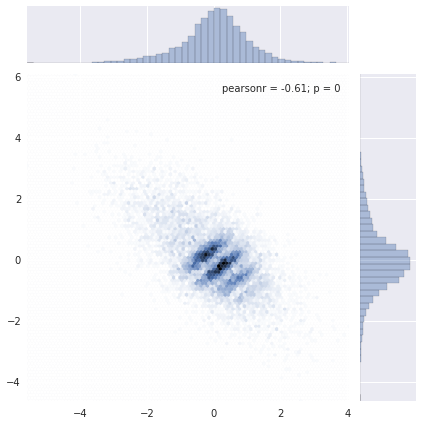

In [10]:
sns.jointplot(signal[:, 0], signal[:, 1], kind='hex');

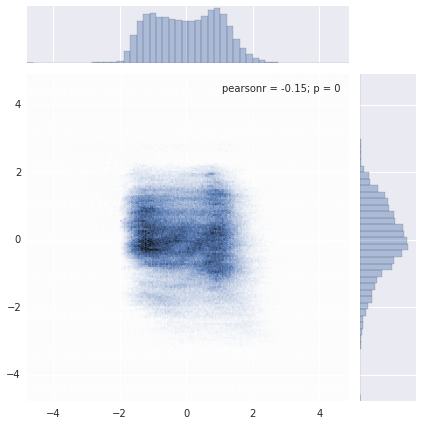

In [5]:
sns.jointplot(mix[:, 0], mix[:, 1], kind='hex');

In [59]:
from sklearn.mixture import GMM
clf = GMM(100, covariance_type='full', n_iter=1000, n_init=10).fit(signal)


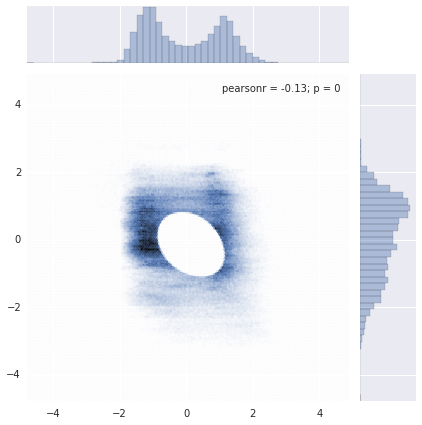

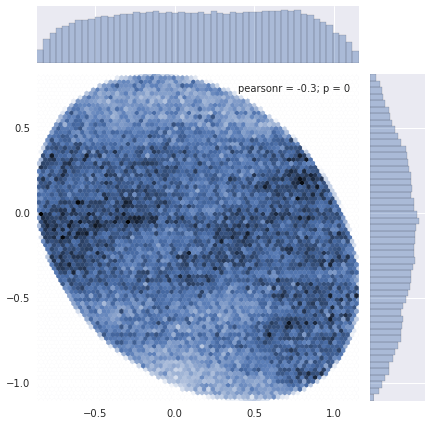

In [64]:
like = np.exp(clf.score(mix))
b = like < 0.1
s = like > 0.1
sns.jointplot(mix[b,0], mix[b,1], kind='hex')
sns.jointplot(mix[s,0], mix[s,1], kind='hex')

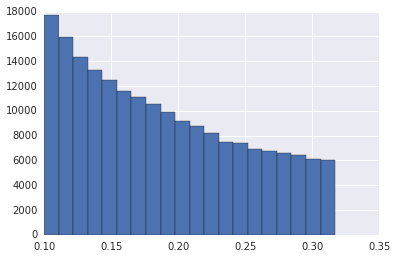

In [67]:
import matplotlib.pyplot as plt
plt.hist(like[s], bins=20);